# Set Up Environment

In [1]:
import os, sys, random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from matplotlib.pyplot import figure

# 

# Define Functions

In [2]:
def get_target(df, col):
    vals = []
    
    for index, row in df.iterrows():
        if row[col] <= 2.3:
            vals.append('High')
        elif row[col] >= 10:
            vals.append('Low')
        else:
            vals.append('Medium')
            
    new_df = df.copy()
    new_df['reactivity'] = vals
    return new_df

# 

# Read isoTOP File

In [3]:
i_df = pd.read_csv('../data/isotop_pdb.csv')

In [4]:
i_df.shape

(9783, 38)

In [5]:
i_df.head()

,identifier,protein,description,peptides,gene,2022_count,2019_count,2010_count,experiment_count,isotop-3_median,...,isotop-20_median,isotop-21_median,isotop-22_median,isotop-23_median,isotop-24_median,mean,sd,Entry,PDB,Classification
0,Q5SRE5_C9,Q5SRE5,Nucleoporin NUP188 homolog,AAAAGGPC*VR,NUP188,13.0,NaN,NaN,13,3.537341,...,NaN,NaN,NaN,NaN,NaN,2.888758,0.777620,Q5SRE5,5IJO;7R5K;,"Chaperone, Transporter, Channel, Receptor"
1,Q9NRL3_C17,Q9NRL3,Striatin-4,AAAAVAAAASSC*RPLGSGAGPGPTGAAPVSAPAPGPGPAGK,STRN4,7.0,NaN,NaN,7,NaN,...,NaN,NaN,NaN,NaN,NaN,4.871786,1.679853,Q9NRL3,NaN,"Scaffolding, Modulator, Adaptor"
2,Q96C19_C172,Q96C19,EF-hand domain-containing protein D2,KAAAGELQEDSGLC*VLAR;AAAGELQEDSGLC*VLAR,EFHD2,13.0,5.0,1.0,19,2.250133,...,NaN,NaN,NaN,NaN,NaN,2.377649,1.301613,Q96C19,5H0P;5I2L;5I2O;5I2Q;,Nucleic Acid and Small Molecule Binding
3,P0DMV8_C17,P0DMV8,Heat shock 70 kDa protein 1A,AAAIGIDLGTTYSC*VGVFQHGK;AAAIGIDLGTTYSC*VGVFQHG...,HSPA1A,13.0,NaN,NaN,13,10.980129,...,NaN,NaN,NaN,NaN,NaN,6.718041,3.760279,P0DMV8,1HJO;1S3X;1XQS;2E88;2E8A;2LMG;3A8Y;3ATU;3ATV;3...,"Chaperone, Transporter, Channel, Receptor"
4,P20810_C408,P20810,Calpastatin,AAAPAPVSEAVC*R,CAST,13.0,NaN,NaN,13,3.719817,...,NaN,NaN,NaN,NaN,NaN,3.621821,0.852873,P20810,NaN,Enzyme


In [6]:
i_df = get_target(i_df, 'mean')
i_df['reactivity'].value_counts()

Medium    7964
Low        996
High       823
Name: reactivity, dtype: int64

# 

# Subset Cysteines by Reactivity

In [7]:
h_df = i_df[i_df['reactivity'] == 'High']
h_c_ids = list(h_df['identifier'].unique())
len(h_c_ids)

823

In [8]:
m_df = i_df[i_df['reactivity'] == 'Medium']
m_c_ids = list(m_df['identifier'].unique())
len(m_c_ids)

7964

In [9]:
l_df = i_df[i_df['reactivity'] == 'Low']
l_c_ids = list(l_df['identifier'].unique())
len(l_c_ids)

996

# 

# Subset Cysteines Associated with PDB

In [10]:
i_pdb_df = i_df[i_df['PDB'].isna() == False]

In [11]:
i_pdb_df['PDB'] = i_pdb_df['PDB'].map(lambda x: str(x)[:-1])

C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_1416\183157068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_pdb_df['PDB'] = i_pdb_df['PDB'].map(lambda x: str(x)[:-1])


In [12]:
i_pdb_df['PDB'] = i_pdb_df['PDB'].map(lambda x: str(x).split(';'))

C:\Users\Onee-sama\AppData\Local\Temp\ipykernel_1416\4147437206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i_pdb_df['PDB'] = i_pdb_df['PDB'].map(lambda x: str(x).split(';'))


In [13]:
pdb_df = i_pdb_df.explode('PDB')

In [14]:
h_pdb_df = pdb_df[pdb_df['reactivity'] == 'High']
h_pdb_ids = list(h_pdb_df['PDB'].unique())
h_pdb_c_ids = list(h_pdb_df['identifier'].unique())
len(h_pdb_ids), len(h_pdb_c_ids)

(4706, 554)

In [15]:
m_pdb_df = pdb_df[pdb_df['reactivity'] == 'Medium']
m_pdb_ids = list(m_pdb_df['PDB'].unique())
m_pdb_c_ids = list(m_pdb_df['identifier'].unique())
len(m_pdb_ids), len(m_pdb_c_ids)

(21031, 5628)

In [16]:
l_pdb_df = pdb_df[pdb_df['reactivity'] == 'Low']
l_pdb_ids = list(l_pdb_df['PDB'].unique())
l_pdb_c_ids = list(l_pdb_df['identifier'].unique())
len(l_pdb_ids), len(l_pdb_c_ids)

(5540, 700)

In [17]:
h_pdb_p_ids = list(h_pdb_df['protein'].unique())
l_pdb_p_ids = list(l_pdb_df['protein'].unique())
len(h_pdb_p_ids), len(l_pdb_p_ids)

(483, 563)

# 

# Read Found Peptides 

In [18]:
pep_df = pd.read_csv('../data/list_found_peptides.csv')

In [19]:
pep_df

,protein,uniprot_resid,pdb,peptide,position,resid,chainid,ratio_mean,ratio_sd,ratio_count,uniprot_identifier,reactivity
0,A0AVT1,96,7PYV,CQAWDLGTNFFLSEDDVVNKR,0,96,A,8.650112,2.696751,3,A0AVT1_C96,Medium
1,A0AVT1,96,7PYV,CQAWDLGTNFFLSEDDVVNKR,0,96,B,8.650112,2.696751,3,A0AVT1_C96,Medium
2,A0AVT1,347,7PYV,KPNVGCQQDSEELLK,5,347,A,1.724610,0.536878,17,A0AVT1_C347,High
3,A0AVT1,347,7PYV,KPNVGCQQDSEELLK,5,347,B,1.724610,0.536878,17,A0AVT1_C347,High
4,A0AVT1,433,7PYV,FSPLCQWLYLEAADIVESLGKPECEEFLPR,23,433,A,4.260000,1.226295,4,A0AVT1_C433,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...
81412,Q9Y6N5,379,6OI6,KYDGYTSCPLVTGYNR,7,379,B,5.785433,0.821703,3,Q9Y6N5_C379,Medium
81413,Q9Y6N5,379,6OIB,KYDGYTSCPLVTGYNR,7,379,A,5.785433,0.821703,3,Q9Y6N5_C379,Medium
81414,Q9Y6N5,379,6OIB,KYDGYTSCPLVTGYNR,7,379,B,5.785433,0.821703,3,Q9Y6N5_C379,Medium
81415,Q9Y6N5,379,6OIC,KYDGYTSCPLVTGYNR,7,379,A,5.785433,0.821703,3,Q9Y6N5_C379,Medium


In [20]:
h_pep_df = pep_df[pep_df['reactivity'] == 'High']
h_pep_ids = list(h_pep_df['pdb'].unique())
h_pep_c_ids = list(h_pep_df['uniprot_identifier'].unique())
len(h_pep_ids), len(h_pep_c_ids)

(1998, 345)

In [21]:
m_pep_df = pep_df[pep_df['reactivity'] == 'Medium']
m_pep_ids = list(m_pep_df['pdb'].unique())
m_pep_c_ids = list(m_pep_df['uniprot_identifier'].unique())
len(m_pep_ids), len(m_pep_c_ids)

(11666, 3413)

In [22]:
l_pep_df = pep_df[pep_df['reactivity'] == 'Low']
l_pep_ids = list(l_pep_df['pdb'].unique())
l_pep_c_ids = list(l_pep_df['uniprot_identifier'].unique())
len(l_pep_ids), len(l_pep_c_ids)

(1753, 322)

# 

# Read Final Selection 

In [23]:
final_df = pd.read_csv('../data/final_selection.csv')

In [24]:
final_df

,protein,pdb,n_biomolecule,total_biomolecule,n_chainid,total_chainid,total_duplicated_chains,chainids_corrected,n_terminus_disorder,c_terminus_disorder,...,uniprot_resid,ratio_mean,ratio_sd,pdb_identifier,structureid,pdb_chainid_identifier,uniprot_identifier,reactivity,main_identifier,unique_identifier
0,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,NaN,NaN,NaN,4CRU_A_C1392,4CRU_A_1392,4CRU_A,NaN,NaN,NaN,NaN
1,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,NaN,NaN,NaN,4CRU_A_C1420,4CRU_A_1420,4CRU_A,NaN,NaN,NaN,NaN
2,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,NaN,NaN,NaN,4CRU_A_C1457,4CRU_A_1457,4CRU_A,NaN,NaN,NaN,NaN
3,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,NaN,NaN,NaN,4CRU_A_C1500,4CRU_A_1500,4CRU_A,NaN,NaN,NaN,NaN
4,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,NaN,NaN,NaN,4CRU_A_C1504,4CRU_A_1504,4CRU_A,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129384,Q9Y613,6XF1,2,2,2,4,0,NaN,0,0,...,31.0,6.370455,2.697119,6XF1_D_C31,6XF1_D_31,6XF1_D,Q9Y613_C31,Medium,Q9Y613_C31_6XF1_D_C31,Q9Y613_C31_6XF1_D_C31_2
129385,Q9Y613,6XF1,2,2,2,4,0,NaN,0,0,...,NaN,NaN,NaN,6XF1_D_C43,6XF1_D_43,6XF1_D,NaN,NaN,NaN,NaN
129386,Q9Y613,6XF1,2,2,2,4,0,NaN,0,0,...,NaN,NaN,NaN,6XF1_D_C71,6XF1_D_71,6XF1_D,NaN,NaN,NaN,NaN
129387,Q9Y613,6XF1,2,2,2,4,0,NaN,0,0,...,NaN,NaN,NaN,6XF1_D_C164,6XF1_D_164,6XF1_D,NaN,NaN,NaN,NaN


In [25]:
final_df.columns.to_list()

['protein',
 'pdb',
 'n_biomolecule',
 'total_biomolecule',
 'n_chainid',
 'total_chainid',
 'total_duplicated_chains',
 'chainids_corrected',
 'n_terminus_disorder',
 'c_terminus_disorder',
 'total_disorder',
 'complete_seq',
 'experiment',
 'resolution',
 'mutation',
 'engineered',
 'peptide',
 'resid',
 'chainid',
 'reactive',
 'ratio_count',
 'complete_res',
 'non_std_aa',
 'hetero',
 'ion',
 'zinc',
 'altloc',
 'nucleic',
 'extended',
 'selected',
 'complete',
 'residue_selection',
 'final_selection',
 'uniprot_resid',
 'ratio_mean',
 'ratio_sd',
 'pdb_identifier',
 'structureid',
 'pdb_chainid_identifier',
 'uniprot_identifier',
 'reactivity',
 'main_identifier',
 'unique_identifier']

In [26]:
final_df = final_df[final_df['uniprot_identifier'].isna() == False]

In [27]:
h_final_df = final_df[final_df['reactivity'] == 'High']
h_final_ids = list(h_final_df['pdb'].unique())
h_final_c_ids = list(h_final_df['uniprot_identifier'].unique())
len(h_final_ids), len(h_final_c_ids)

(1519, 306)

In [28]:
m_final_df = final_df[final_df['reactivity'] == 'Medium']
m_final_ids = list(m_final_df['pdb'].unique())
m_final_c_ids = list(m_final_df['uniprot_identifier'].unique())
len(m_final_ids), len(m_final_c_ids)

(8639, 3120)

In [29]:
l_final_df = final_df[final_df['reactivity'] == 'Low']
l_final_ids = list(l_final_df['pdb'].unique())
l_final_c_ids = list(l_final_df['uniprot_identifier'].unique())
len(l_final_ids), len(l_final_c_ids)

(1313, 297)

# 

# Read Nonredundant 

In [30]:
nr_df = pd.read_csv('../data/isotop_training_nonredundant_complete_final_identifiers.csv')

In [31]:
nr_df

,protein,pdb,n_biomolecule,total_biomolecule,n_chainid,total_chainid,total_duplicated_chains,chainids_corrected,n_terminus_disorder,c_terminus_disorder,...,ratio_mean,ratio_sd,pdb_identifier,structureid,pdb_chainid_identifier,uniprot_identifier,reactivity,main_identifier,unique_identifier,pdbid
0,A5YKK6,4CRU,1,1,2,2,0,NaN,4,3,...,3.308962,0.889566,4CRU_A_C1541,4CRU_A_1541,4CRU_A,A5YKK6_C1541,Medium,A5YKK6_C1541_4CRU_A_C1541,A5YKK6_C1541_4CRU_A_C1541_1,4CRU
1,A5YKK6,4CT7,1,1,2,2,0,NaN,0,7,...,3.308962,0.889566,4CT7_A_C1541,4CT7_A_1541,4CT7_A,A5YKK6_C1541,Medium,A5YKK6_C1541_4CT7_A_C1541,A5YKK6_C1541_4CT7_A_C1541_1,4CT7
2,A5YKK6,5ONA,1,2,3,6,0,NaN,8,2,...,3.308962,0.889566,5ONA_A_C1541,5ONA_A_1541,5ONA_A,A5YKK6_C1541,Medium,A5YKK6_C1541_5ONA_A_C1541,A5YKK6_C1541_5ONA_A_C1541_1,5ONA
3,O00139,2GRY,1,1,1,1,0,NaN,62,3,...,12.674860,9.113273,2GRY_A_C172,2GRY_A_172,2GRY_A,O00139_C199,Low,O00139_C199_2GRY_A_C172,O00139_C199_2GRY_A_C172_1,2GRY
4,O00139,2GRY,1,1,1,1,0,NaN,62,3,...,5.367091,1.570646,2GRY_A_C379,2GRY_A_379,2GRY_A,O00139_C406,Medium,O00139_C406_2GRY_A_C379,O00139_C406_2GRY_A_C379_1,2GRY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,Q9Y265,7OLE,1,1,9,9,0,NaN,0,0,...,15.604327,4.476462,7OLE_A_C239,7OLE_A_239,7OLE_A,Q9Y265_C141,Low,Q9Y265_C141_7OLE_A_C239,Q9Y265_C141_7OLE_A_C239_1,7OLE
11277,Q9Y230,7AHO,1,1,6,6,0,NaN,0,0,...,5.177512,1.182028,7AHO_F_C290,7AHO_F_290,7AHO_F,Q9Y230_C375,Medium,Q9Y230_C375_7AHO_F_C290,Q9Y230_C375_7AHO_F_C290_1,7AHO
11278,Q9Y265,7AHO,1,1,6,6,0,NaN,0,0,...,8.714663,4.104160,7AHO_A_C63,7AHO_A_63,7AHO_A,Q9Y265_C49,Medium,Q9Y265_C49_7AHO_A_C63,Q9Y265_C49_7AHO_A_C63_1,7AHO
11279,Q9Y3C8,7OVC,1,1,2,2,0,NaN,0,0,...,6.945282,2.090862,7OVC_A_C116,7OVC_A_116,7OVC_A,Q9Y3C8_C116,Medium,Q9Y3C8_C116_7OVC_A_C116,Q9Y3C8_C116_7OVC_A_C116_1,7OVC


In [32]:
len(nr_df['pdb'].unique())

3845

In [33]:
h_nr_df = nr_df[nr_df['reactivity'] == 'High']
h_nr_ids = list(h_nr_df['pdb'].unique())
h_nr_c_ids = list(h_nr_df['uniprot_identifier'].unique())
len(h_nr_ids), len(h_nr_c_ids)

(644, 306)

In [34]:
m_nr_df = nr_df[nr_df['reactivity'] == 'Medium']
m_nr_ids = list(m_nr_df['pdb'].unique())
m_nr_c_ids = list(m_nr_df['uniprot_identifier'].unique())
len(m_nr_ids), len(m_nr_c_ids)

(3492, 3120)

In [35]:
l_nr_df = nr_df[nr_df['reactivity'] == 'Low']
l_nr_ids = list(l_nr_df['pdb'].unique())
l_nr_c_ids = list(l_nr_df['uniprot_identifier'].unique())
len(l_nr_ids), len(l_nr_c_ids)

(662, 297)

In [36]:
hl_ids = list(set(h_nr_ids + l_nr_ids))
len(hl_ids)

1179

# 

# Read PDB Meric State

In [37]:
meric_state = pd.read_csv('../data/isotop_pdb_meric_state.csv')

In [38]:
meric_state.shape

(1774, 6)

In [39]:
meric_state

,pdb,reactivity,0,pdbid,biological_unit,unit
0,3LFL,High,reduced_3lfl.pdb:REMARK 350 AUTHOR DETERMINED ...,3LFL,DIMERIC,DIMERIC
1,5CVD,High,reduced_5cvd.pdb:REMARK 350 AUTHOR DETERMINED ...,5CVD,DIMERIC,DIMERIC
2,4WJA,High,reduced_4wja.pdb:REMARK 350 AUTHOR DETERMINED ...,4WJA,DIMERIC,DIMERIC
3,4O56,High,reduced_4o56.pdb:REMARK 350 AUTHOR DETERMINED ...,4O56,DIMERIC,DIMERIC
4,5J19,High,reduced_5j19.pdb:REMARK 350 AUTHOR DETERMINED ...,5J19,DIMERIC,DIMERIC
...,...,...,...,...,...,...
1769,5GL7,Low,reduced_5gl7.pdb:REMARK 350 AUTHOR DETERMINED ...,5GL7,MONOMERIC,MONOMERIC
1770,3DLX,Low,reduced_3dlx.pdb:REMARK 350 AUTHOR DETERMINED ...,3DLX,DIMERIC,DIMERIC
1771,3DLX,Low,reduced_3dlx.pdb:REMARK 350 AUTHOR DETERMINED ...,3DLX,DIMERIC,DIMERIC
1772,1AJE,Low,reduced_1aje.pdb:REMARK 350 AUTHOR DETERMINED ...,1AJE,MONOMERIC,MONOMERIC


# 

# Plot Number of Cysetines Experimentally Identified, Assoc. with a PDB, Resolved in a PDB, and in the Training Set

In [40]:
labels = ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']
groups = ['Experimentally\nIdentified', 'Experimentally\nIdentified', 'Associated\nwith a PDB', 'Associated\nwith a PDB', 'Resolved\nin a PDB', 'Resolved\nin a PDB', 'Training\nSet', 'Training\nSet']
values = [823, 996, 554, 700, 345, 322, 306, 297]
grouped_df = pd.DataFrame()
grouped_df['Reactivity'] = labels
grouped_df['Dataset'] = groups
grouped_df['Count'] = values

In [41]:
grouped_df

,Reactivity,Dataset,Count
0,High,Experimentally\nIdentified,823
1,Low,Experimentally\nIdentified,996
2,High,Associated\nwith a PDB,554
3,Low,Associated\nwith a PDB,700
4,High,Resolved\nin a PDB,345
5,Low,Resolved\nin a PDB,322
6,High,Training\nSet,306
7,Low,Training\nSet,297


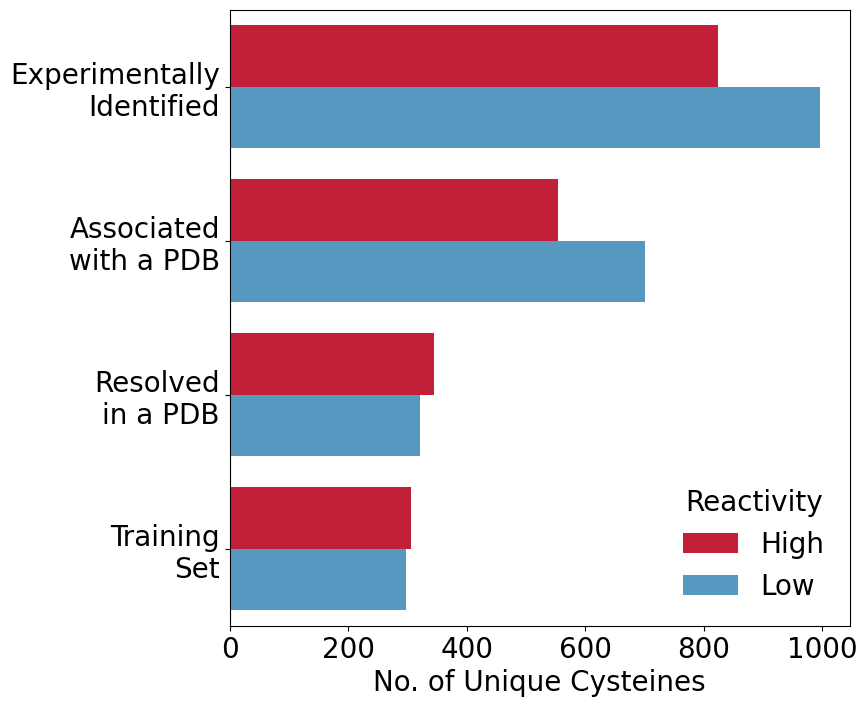

In [42]:
fig = figure(figsize = (8,8))
g = sns.barplot(
    data=grouped_df, 
    x="Count", y="Dataset", hue = 'Reactivity',
    palette = {
        'High': '#dd0426',
        'Low': '#449dd1'
    }
)

plt.ylabel('', size = 20)
plt.xlabel('No. of Unique Cysteines', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.legend(frameon = False, fontsize=20, title = 'Reactivity', title_fontsize = 20)

plt.show()

# 

# Plot Number of PDBs Assoc. with Experimentally Identified Proteins, with Experimentally Identified Cysteine Resolved, with Experimentally Identified Cysteine Not Mutated in Assoc. PDB, and PDB in the Training Set

In [43]:
labels = ['High', 'Low', 'High', 'Low', 'High', 'Low', 'High', 'Low']
groups = ['Protein\nis Associated\nwith PDB', 'Protein\nis Associated\nwith PDB', 'Cysteine\nis Resolved\nin PDB', 'Cysteine\nis Resolved\nin PDB', 'Cysteine\nis not Mutated\nin PDB', 'Cysteine\nis not Mutated\nin PDB', 'Training\nSet', 'Training\nSet']
values = [4706, 5540, 1998, 1753, 1519, 1313, 644, 662]
grouped_df = pd.DataFrame()
grouped_df['Reactivity'] = labels
grouped_df['Dataset'] = groups
grouped_df['Count'] = values

In [44]:
grouped_df

,Reactivity,Dataset,Count
0,High,Protein\nis Associated\nwith PDB,4706
1,Low,Protein\nis Associated\nwith PDB,5540
2,High,Cysteine\nis Resolved\nin PDB,1998
3,Low,Cysteine\nis Resolved\nin PDB,1753
4,High,Cysteine\nis not Mutated\nin PDB,1519
5,Low,Cysteine\nis not Mutated\nin PDB,1313
6,High,Training\nSet,644
7,Low,Training\nSet,662


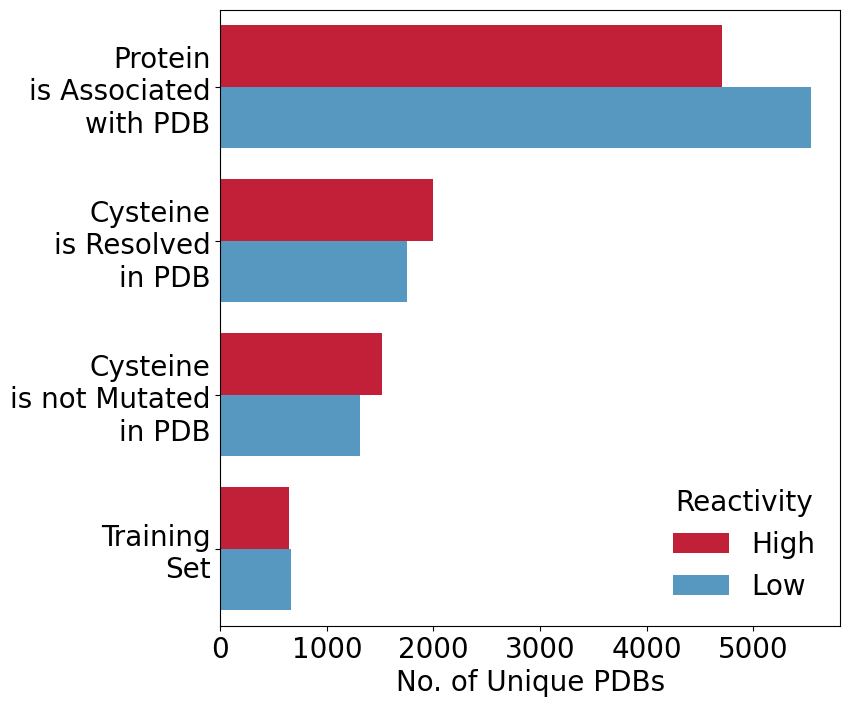

In [45]:
fig = figure(figsize = (8,8))

g = sns.barplot(
    data=grouped_df, 
    y="Dataset", x="Count", hue = 'Reactivity',
    palette = {
        'High': '#dd0426',
        'Low': '#449dd1'
    }
)

plt.ylabel('', size = 20)
plt.xlabel('No. of Unique PDBs', size = 20)
plt.xticks(size = 20)
plt.yticks(size = 20)

plt.legend(frameon = False, fontsize=20, title = 'Reactivity', title_fontsize = 20)

plt.show()

# 

# Calculate the Number of PDBs per Protein

In [46]:
nr_pdb_pro_df = nr_df[['protein', 'pdb']].drop_duplicates()
nr_pdb_pro_df['count'] = 1

In [47]:
extreme_nr_df = nr_df[(nr_df['reactivity'] != 'Medium')]
extreme_nr_ext_pdb_pro_df = extreme_nr_df[['protein', 'pdb']].drop_duplicates()
extreme_nr_ext_pdb_pro_df['count'] = 1
ext_pdb_pro_df = pd.DataFrame(extreme_nr_ext_pdb_pro_df.groupby(['protein'])['count'].sum())

In [48]:
ext_protein_counts = ext_pdb_pro_df['count'].value_counts().to_list()
ext_pdb_counts = ext_pdb_pro_df['count'].value_counts().index.to_list()
ext_pdb_counts_df = pd.DataFrame()
ext_pdb_counts_df['PDB_Count'] = ext_pdb_counts
ext_pdb_counts_df['Protein_Count'] = ext_protein_counts

In [49]:
ext_pdb_counts_df

,PDB_Count,Protein_Count
0,1,241
1,2,106
2,3,59
3,4,38
4,5,18
5,6,12
6,7,8
7,8,5
8,11,2
9,9,2


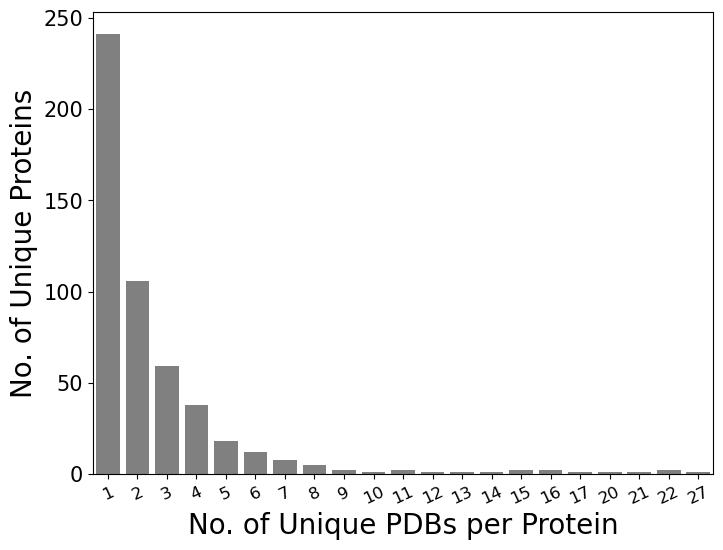

In [50]:
fig = figure(figsize = (8, 6))

sns.barplot(data = ext_pdb_counts_df, x = 'PDB_Count', y = 'Protein_Count', palette = ['grey'])

plt.ylabel('No. of Unique Proteins', size = 20)
plt.xlabel('No. of Unique PDBs per Protein', size = 20)
plt.xticks(size = 12, rotation = 25)
plt.yticks(size = 15)

plt.show()

# 

# Number of Chains per PDB 

In [51]:
nr_ext_pdb_chain_df = extreme_nr_df[['pdb', 'pdb_chainid_identifier']].drop_duplicates()
nr_ext_pdb_chain_df['count'] = 1
ext_pdb_chain_df = pd.DataFrame(nr_ext_pdb_chain_df.groupby(['pdb'])['count'].sum())

In [52]:
ext_chain_counts = ext_pdb_chain_df['count'].value_counts().to_list()
ext_pdb_counts = ext_pdb_chain_df['count'].value_counts().index.to_list()
ext_chain_counts_df = pd.DataFrame()
ext_chain_counts_df['Chain_Count'] = ext_pdb_counts
ext_chain_counts_df['PDB_Count'] = ext_chain_counts

In [53]:
ext_chain_counts_df

,Chain_Count,PDB_Count
0,1,1093
1,2,45
2,3,27
3,4,10
4,5,4


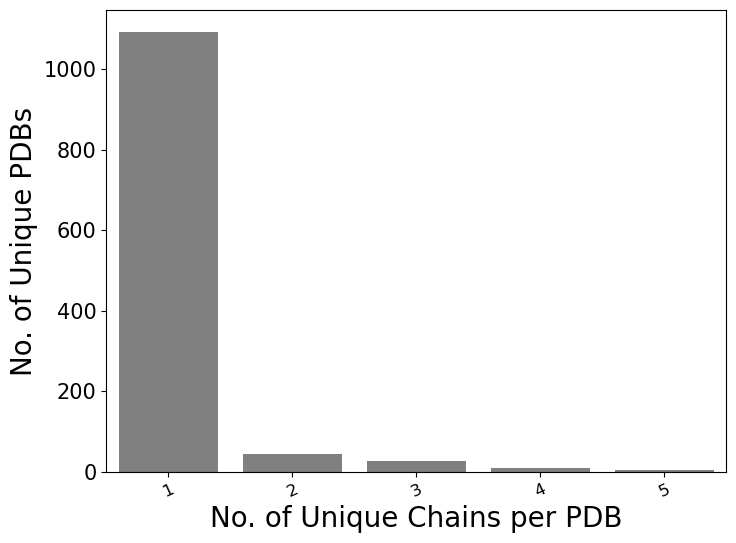

In [54]:
fig = figure(figsize = (8, 6))

sns.barplot(data = ext_chain_counts_df, y = 'PDB_Count', x = 'Chain_Count', palette = ['grey'])

plt.ylabel('No. of Unique PDBs', size = 20)
plt.xlabel('No. of Unique Chains per PDB', size = 20)

plt.xticks(size = 12, rotation = 25)
plt.yticks(size = 15)

plt.show()

# 

# PDB Experimental Method per Reactivity 

In [55]:
ts_method_df = extreme_nr_df[['pdb', 'experiment', 'reactivity']].drop_duplicates()

In [56]:
h_method_df = ts_method_df[ts_method_df['reactivity'] == 'High']
h_method_counts = h_method_df['experiment'].value_counts().to_list()
h_method_ids = h_method_df['experiment'].value_counts().index.to_list()
h_method_counts_df = pd.DataFrame()
h_method_counts_df['Method_Count'] = h_method_counts
h_method_counts_df['Method_Type'] = h_method_ids
h_method_counts_df

,Method_Count,Method_Type
0,458,X-RAY DIFFRACTION
1,141,ELECTRON MICROSCOPY
2,45,SOLUTION NMR


In [57]:
l_method_df = ts_method_df[ts_method_df['reactivity'] == 'Low']
l_method_counts = l_method_df['experiment'].value_counts().to_list()
l_method_ids = l_method_df['experiment'].value_counts().index.to_list()
l_method_counts_df = pd.DataFrame()
l_method_counts_df['Method_Count'] = l_method_counts
l_method_counts_df['Method_Type'] = l_method_ids
l_method_counts_df

,Method_Count,Method_Type
0,494,X-RAY DIFFRACTION
1,121,ELECTRON MICROSCOPY
2,47,SOLUTION NMR


In [58]:
ts_method_counts_df = pd.DataFrame()
ts_method_counts_df['Method_Count'] = h_method_counts + l_method_counts
ts_method_counts_df['Method_Type'] = h_method_ids + l_method_ids
ts_method_counts_df['Reactivity'] = ['High', 'High', 'High', 'Low', 'Low', 'Low']
ts_method_counts_df['Exp_Method'] = ['X-RAY', 'EM', "NMR", 'X-RAY', 'EM', "NMR"]

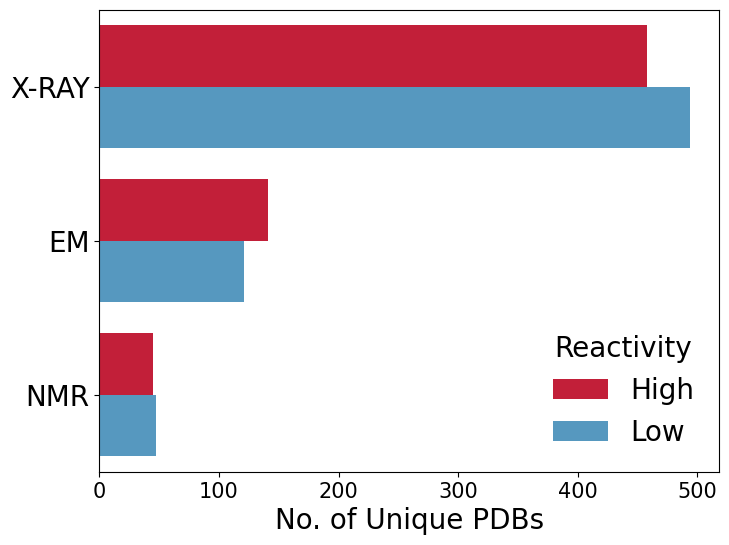

In [59]:
fig = figure(figsize = (8, 6))

sns.barplot(data = ts_method_counts_df, x = 'Method_Count', y = 'Exp_Method', hue = 'Reactivity', palette = {
        'High': '#dd0426',
        'Low': '#449dd1'
    })

plt.ylabel('', size = 20)
plt.xlabel('No. of Unique PDBs', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 20)

plt.legend(frameon = False, fontsize=20, title = 'Reactivity', title_fontsize = 20)

plt.show()

# 

# Number of PDBs per Meric State 

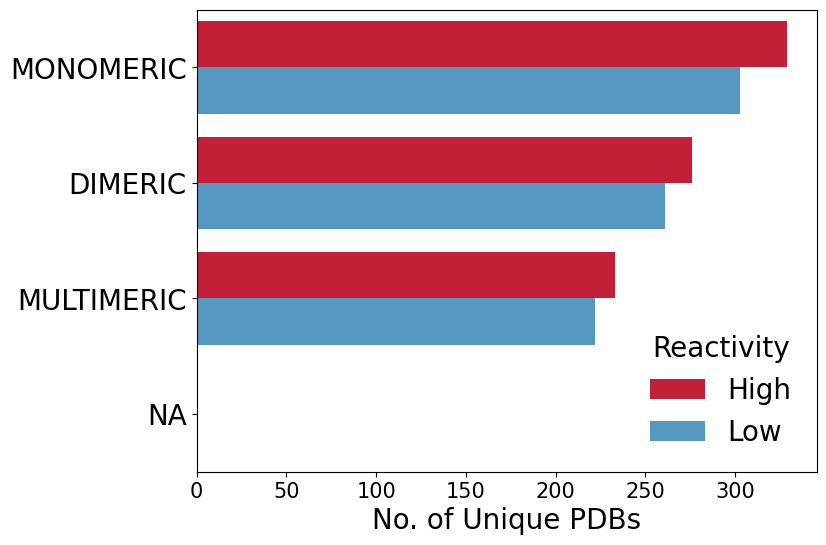

In [60]:
fig = figure(figsize = (8, 6))

sns.countplot(data = meric_state, y="unit", hue = 'reactivity',
              order = ['MONOMERIC', 'DIMERIC', 'MULTIMERIC', 'NA'],
             palette = {
                        'High': '#dd0426',
                        'Low': '#449dd1'
             })

plt.ylabel('', size = 20)
plt.xlabel('No. of Unique PDBs', size = 20)
plt.xticks(size = 15)
plt.yticks(size = 20)

plt.legend(frameon = False, fontsize=20, title = 'Reactivity', title_fontsize = 20)

plt.show()